# **VLSI CAD Assignment 2**



*   Alex Moby Philip (211EC207)
*   Arvindh Ganesan (211EC211)
*   V Vignesh Karthik (211EC258)




In [67]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import networkx as nx

In [68]:
# Defining a class for utilising stack functions: Push, Pop and Peek

class Stack:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[-1]

In [69]:
# Function to read text files and extract block dimensions, polish expression and wire length matrix

def read_text_file(filename):
    blocks = []
    with open(filename, 'r') as file:
        for line in file:
            row = [int(x.strip()) for x in line.split(',')]
            blocks.append(row)
    return blocks

def read_polish_expression(filename):
    count_operator = 0
    count_operand = 0
    with open(filename, 'r') as file:
        input_string = file.read().strip()
    polish_expression = []
    for char in input_string:
        if char.isdigit():
            polish_expression.append(int(char))
        else:
            polish_expression.append(char)
    for i in range(0, len(polish_expression)):
        if(type(polish_expression[i]) is int):
            count_operand = count_operand + 1
        else:
            count_operator = count_operator + 1
    if(count_operand == count_operator):
        raise ValueError("Invalid Polish expression")
    return polish_expression

def read_wire_length_matrix(filename):
    wire_length_matrix = []
    with open(filename, 'r') as file:
        for line in file:
            row = [int(x) for x in line.split()]
            wire_length_matrix.append(row)
    return wire_length_matrix

# Function to check if length of blocks dimension matrix and wire length matrix match

def check_input_files(size_of_blocks, wire_length_matrix):
    if(len(size_of_blocks) != len(wire_length_matrix)):
        raise ValueError("Invalid input files. Number of blocks and wire length matrix do not match.")

In [70]:
log_file_path = "log.txt"
size_of_blocks = read_text_file('blocks.txt')
polish_expression = read_polish_expression('polish_expression.txt')
wire_length_matrix = read_wire_length_matrix('wire_length_matrix.txt')
check_input_files(size_of_blocks, wire_length_matrix)

In [71]:
# Function to plot the blocks using matplotlib

def plot_block(coordinates):
  # xmax, ymax = 0, 0
  # xmin, ymin = 100000, 100000
  # for i in range(0, len(coordinates)):
  #   if(coordinates[i][3] > xmax):
  #     xmax = coordinates[i][3]
  #   if(coordinates[i][4] > ymax):
  #     ymax = coordinates[i][4]
  #   if(coordinates[i][3] < xmin):
  #     xmin = coordinates[i][3]
  #   if(coordinates[i][4] < ymin):
  #     ymin = coordinates[i][4]

    fig, ax = plt.subplots()

    for coordinate in coordinates:
        block_id, width, height, x1, y1 = coordinate
        ax.add_patch(plt.Rectangle((x1, y1), width, height, edgecolor='black', facecolor='none'))
        # ax.text(x + width / 2, y + height / 2, f"Block [len(ax.patches)}", ha='center', va='center')
        plt.text(x1+width/2, y1+height/2, block_id)
    ax.set_aspect('equal', adjustable='box')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('VLSI Layout')
    ax.set_xlim(-60, 60)
    ax.set_ylim(-60, 60)
    plt.show()

In [72]:
# Initializing a stack and the coordinates of blocks

coordinates = list()
x1, y1 = 0, 0
blocks = []
stack1 = Stack()

In [73]:
# Defining a class for accessing the nodes in the Polish expression

class Node:
  def __init__(self, data):
    self.data = data
    self.left = None  # Reference to the left child node
    self.right = None  # Reference to the right child node
    self.parent = None
    self.xl = 0 # Left x coordinate
    self.yl = 0 # Lower y coordinate
    self.xr = 0 # Right x coordinate
    self.yr = 0 # Upper y coordinate

  def __str__(self):
    return str(self.data)

In [74]:
# Function to convert the given Polish expression into a binary tree using stack

def ptog(polish_expression):
  for ch in polish_expression:
    if(type(ch) is int):
      node = Node(ch) # Pushing an operand into the stack
      stack1.push(node)
    elif(ch == 'H' or ch == 'V'):
      node = Node(ch)           # Popping two operands when we encounter an operator
      node.right = stack1.pop() # Assigning them as left child and right child
      node.right.parent = node  # Assigning the parent node
      node.left = stack1.pop()
      node.left.parent = node   # Assigning the parent node
      stack1.push(node)
  return node
print(ptog(polish_expression))
node = ptog(polish_expression)

H


In [75]:
# Function to create and traverse a binary tree by defining the operators as parent nodes and operands as child nodes
# plot(node, coordinates) is recursively called until the tree is travsersed and before it returns we update parent node

x1, y1 = 0, 0
coordinates1 = list()
def plot(node, coordinates):
  if(node.left == None and node.parent.left.data == node.data and node.parent.data == 'V'):
    x1 = node.parent.xl
    y1 = node.parent.yl
    node.xl = x1
    node.yl = y1
    node.xr = x1 + size_of_blocks[node.data-1][1]
    node.yr = y1 + size_of_blocks[node.data-1][2]
    coordinates.append((node.data, size_of_blocks[node.data-1][1], size_of_blocks[node.data-1][2], node.xl, node.yl))
    node.parent.xl = node.xl + size_of_blocks[node.data-1][1]
    node.parent.yl = node.yl
    node.parent.xr = node.xr
    node.parent.yr = node.yr
    return
  elif(node.left == None and node.parent.left.data == node.data and node.parent.data == 'H'):
    x1 = node.parent.xl
    y1 = node.parent.yr
    node.xl = x1
    node.yl = y1
    node.xr = x1 + size_of_blocks[node.data-1][1]
    node.yr = y1 + size_of_blocks[node.data-1][2]
    coordinates.append((node.data, size_of_blocks[node.data-1][1], size_of_blocks[node.data-1][2], node.xl, node.yl))
    node.parent.xl = node.xl
    node.parent.yl = node.yl + size_of_blocks[node.data-1][2]
    node.parent.xr = node.xr
    node.parent.yr = node.yr
    return
  elif(node.right == None and node.parent.right.data == node.data and node.parent.data == 'V'):
    x1 = node.parent.xl
    y1 = node.parent.yl
    node.xl = x1
    node.yl = y1
    node.xr = x1 + size_of_blocks[node.data-1][1]
    node.yr = y1 + size_of_blocks[node.data-1][2]
    coordinates.append((node.data, size_of_blocks[node.data-1][1], size_of_blocks[node.data-1][2], node.xl, node.yl))
    node.parent.xl = node.xl
    node.parent.yl = node.yl
    node.parent.xr = node.xr
    node.parent.yr = max(node.parent.left.yr, node.yr)
    return
  elif(node.right == None and node.parent.right.data == node.data and node.parent.data == 'H'):
    x1 = node.parent.xl
    y1 = node.parent.yr
    node.xl = x1
    node.yl = y1
    node.xr = x1 + size_of_blocks[node.data-1][1]
    node.yr = y1 + size_of_blocks[node.data-1][2]
    coordinates.append((node.data, size_of_blocks[node.data-1][1], size_of_blocks[node.data-1][2], node.xl, node.yl))
    node.parent.xl = node.xl
    node.parent.yl = node.yl
    node.parent.xr = max(node.parent.left.xr, node.xr)
    node.parent.yr = node.yr
    return
  if(node.left != None):
    if(node.parent != None):
      node.xl = node.parent.xl
      node.xr = node.parent.xr
      node.yl = node.parent.yl
      node.yr = node.parent.yr
    plot(node.left, coordinates)
  if(node.right != None and node.data == 'H'):
    node.xl = node.left.xl
    node.xr = node.left.xr
    node.yl = node.left.yr
    node.yr = node.left.yr
    plot(node.right, coordinates)
  elif(node.right != None and node.data == 'V'):
    node.xl = node.left.xr
    node.xr = node.left.xr
    node.yl = node.left.yl
    node.yr = node.left.yr
    plot(node.right, coordinates)
  if(node.right != None and node.left != None and (node.data == 'V' or node.data == 'H')): # Left child and right child updates parent
    node.xl = node.right.xl
    node.xr = node.right.xr
    node.yl = node.right.yl
    node.yr = node.right.yr
  return coordinates
coordinates1 = plot(node, coordinates1)
print(coordinates1)

[(1, 10, 10, 0, 0), (2, 10, 15, 10, 0), (3, 10, 5, 10, 15), (4, 5, 10, 10, 20), (5, 5, 5, 10, 30), (6, 15, 10, 15, 30), (7, 5, 5, 30, 30)]


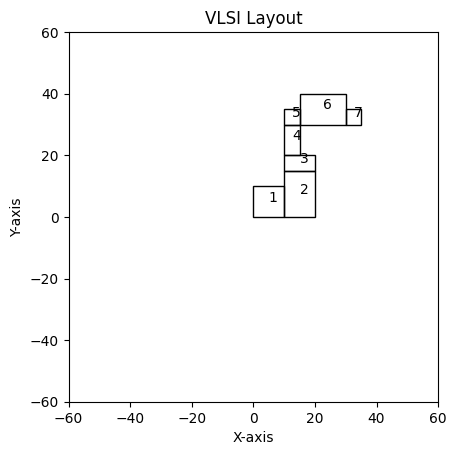

In [76]:
# Plotting the created binary tree into a floorplan

plot_block(coordinates1)

In [77]:
# Function to compute the routing length between blocks
# Calculating Manhattan distance using lowermost coordinate and width and height.

def routing_length(wire_length_matrix, coordinates):
  length = 0
  for i in range(0, len(wire_length_matrix)):
    for j in range(0, len(coordinates)):
      length = length + abs(((coordinates[i][1]/2 + coordinates[i][3]) - (coordinates[j][1]/2 + coordinates[j][3]))+((coordinates[i][2]/2 + coordinates[i][4]) - (coordinates[j][2]/2 + coordinates[j][4])))*wire_length_matrix[i][j]
  return length
# routing_length(wire_length_matrix, coordinates1)

In [78]:
# Function to compute area of the floorplan based on given Polish expression

def floorplan_area(coordinates):
  xmin = 1000000
  ymin = 1000000
  xmax = 0
  ymax = 0
  for i in range(0, len(coordinates)):
    if(coordinates[i][3] < xmin):
      xmin = coordinates[i][3]
    if(coordinates[i][4] < ymin):
      ymin = coordinates[i][4]
    if(coordinates[i][3] + coordinates[i][1] > xmax):
      xmax = coordinates[i][3] + coordinates[i][1]
    if(coordinates[i][4] + coordinates[i][2] > ymax):
      ymax = coordinates[i][4] + coordinates[i][2]
  return ((xmax-xmin)*(ymax-ymin))

In [79]:
# Function to compute cost function given as 0.75*A + 0.25*W

def cost_floorplan(floorplan_area, routing_length):
  return ((0.75*floorplan_area)+(0.25*routing_length))

In [80]:
# Definition of Move M1: To swap between two adjacent operands

def m1(polish_expression):
  count = 0
  for i in range(0, len(polish_expression)-1):
    if(type(polish_expression[i]) is int and type(polish_expression[i+1]) is int):
      if(random.random() < 0.5 and count == 0):
        polish_expression[i] = polish_expression[i] + polish_expression[i+1]
        polish_expression[i+1] = polish_expression[i] - polish_expression[i+1]
        polish_expression[i] = polish_expression[i] - polish_expression[i+1]
        count = 1
  return polish_expression

In [81]:
# Definition of Move M2: To complement two adjacent operators between two operands

def m2(polish_expression):
  count = 0
  temp = ''
  for i in range(0, len(polish_expression)-1):
    if((polish_expression[i] == 'H' or polish_expression[i] == 'V') and (polish_expression[i+1] == 'H' or polish_expression[i+1] == 'V')):
      if(random.random() < 0.5 and count == 0):
        temp = polish_expression[i+1]
        polish_expression[i+1] = polish_expression[i]
        polish_expression[i] = temp
        count = 1
  return polish_expression

In [82]:
# Function to find consecutive repeated operators to maintain a Normalized Polish Expression

def find_consecutive_repeated_letters(arr):
    for i in range(len(arr) - 1):
        if arr[i] == arr[i + 1] and arr[i] in ['H', 'V']:
            return 1
    return None

In [83]:
# Definition of Move M3: To swap between two adjacent operator and operand

def m3(polish_expression):
  count = 0
  count_operator = 0
  count_operand = 0
  for i in range(0, len(polish_expression)-1):
    if(polish_expression[i] == 'V' or polish_expression[i] == 'H'):
      count_operator = count_operator + 1
    elif(type(polish_expression[i]) is int):
      count_operand = count_operand + 1
    # print(count_operand, count_operator)
    if(((polish_expression[i] == 'H' or polish_expression[i] == 'V') and (type(polish_expression[i+1]) is int)) or (type(polish_expression[i]) is int and (polish_expression[i+1] == 'H' or polish_expression[i+1] == 'V'))):
      if(random.random() < 0.5 and count == 0 and count_operand-1 > count_operator+1):
        temp = polish_expression[i+1]
        polish_expression[i+1] = polish_expression[i]
        polish_expression[i] = temp
        if(not find_consecutive_repeated_letters(polish_expression[i-1:i+3])):
          count = 1
        else:
          temp = polish_expression[i+1]
          polish_expression[i+1] = polish_expression[i]
          polish_expression[i] = temp
  return polish_expression
m3(polish_expression)

[1, 2, 'V', 3, 'H', 4, 5, 6, 'V', 'H', 'V', 7, 'H']

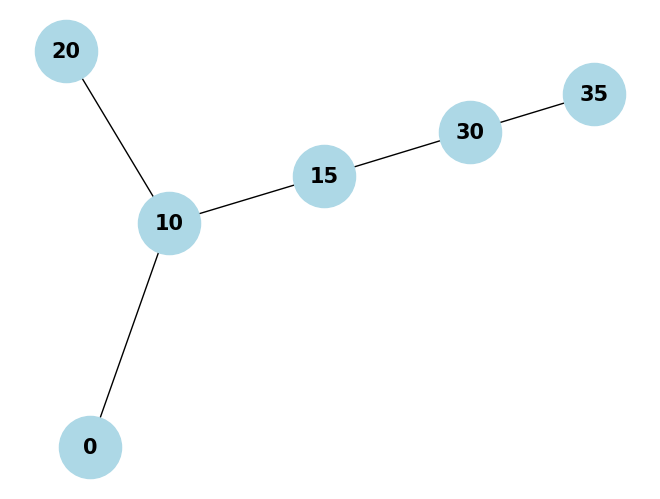

In [84]:
# Function to plot Horizontal Polar Graphs
# Move through each x coordinate and check how far the block extends
# Add an edge to that x coordinate

def horizontal_polar(coordinates):
  G = nx.Graph()
  for i in range(0, len(coordinates1)):
    G.add_node(coordinates1[i][3])
  x_list = np.array(G.nodes())
  for i in range(0, len(x_list)):
    for j in range(0, len(coordinates1)):
      if(coordinates1[j][3] == x_list[i]):
        G.add_edge(coordinates1[j][3]+coordinates1[j][1], x_list[i])

  nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=15, font_weight='bold')
  plt.show()
horizontal_polar(coordinates1)

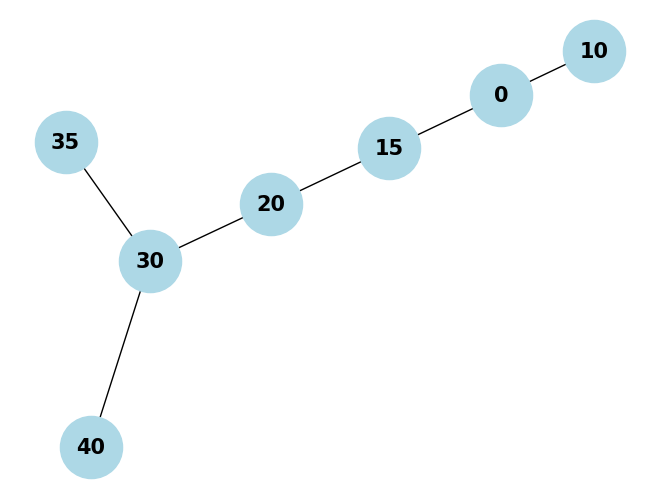

In [85]:
# Function to plot Vertical Polar Graphs
# Move through each y coordinate and check how far the block extends
# Add an edge to that y coordinate

def vertical_polar(coordinates):
  G = nx.Graph()
  for i in range(0, len(coordinates1)):
    G.add_node(coordinates1[i][4])
  y_list = np.array(G.nodes())
  for i in range(0, len(y_list)):
    for j in range(0, len(coordinates1)):
      if(coordinates1[j][4] == y_list[i]):
        G.add_edge(coordinates1[j][4]+coordinates1[j][2], y_list[i])

  nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=15, font_weight='bold')
  plt.show()
vertical_polar(coordinates1)

-------------------- Simulated Annealing Greedy --------------------
Initial score: 1332.5


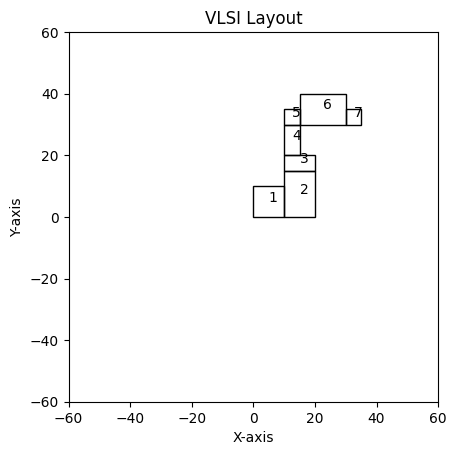

Performing move m2
[1, 2, 'V', 3, 'H', 4, 5, 6, 'H', 'V', 'V', 7, 'H']
Score at iteration 0: 1682.5


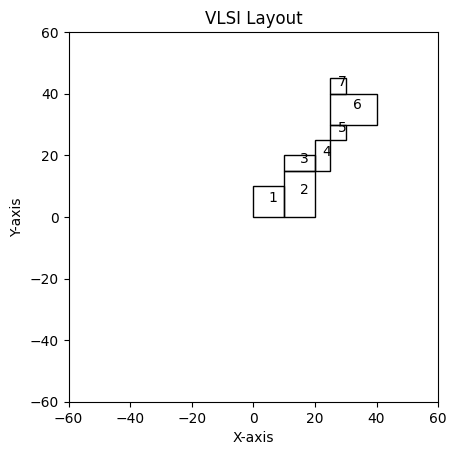

Performing move m2
[1, 2, 'V', 3, 'H', 4, 5, 6, 'V', 'H', 'V', 7, 'H']
Score at iteration 1: 1685.0


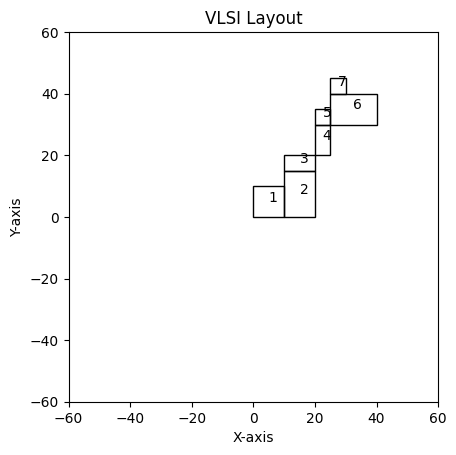

Performing move m1
[1, 2, 'V', 3, 'H', 5, 4, 6, 'V', 'H', 'V', 7, 'H']
Score at iteration 2: 1502.5


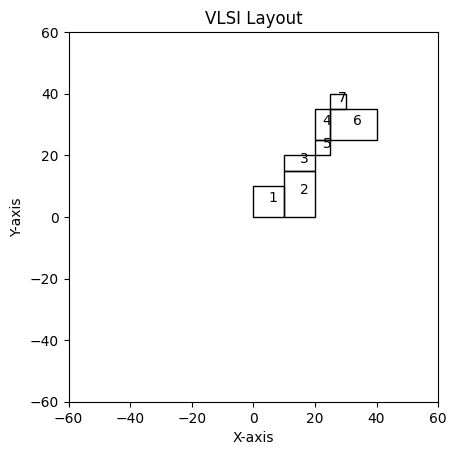

Performing move m1
[2, 1, 'V', 3, 'H', 5, 4, 6, 'V', 'H', 'V', 7, 'H']
Score at iteration 3: 1322.5
Score - best score = -10.0


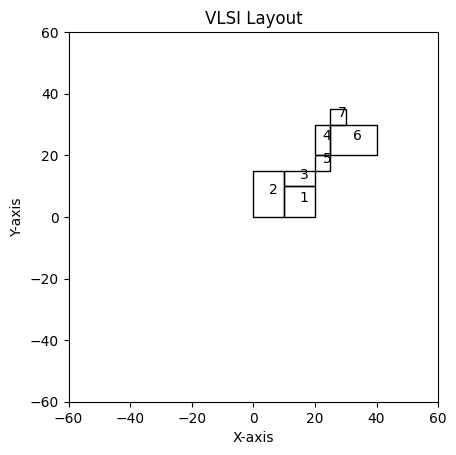

Performing move m1
[1, 2, 'V', 3, 'H', 5, 4, 6, 'V', 'H', 'V', 7, 'H']
Score at iteration 4: 1502.5


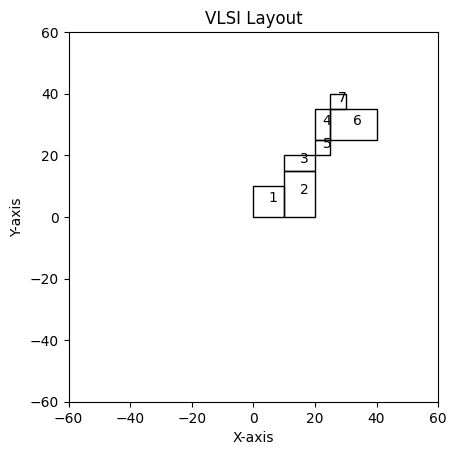

In [86]:
# Function to perform a greedy method of Simulated annealing: To only accept solutions that are better than its best iteration
# We perform m1, m2 or m3 randomly
# Make a graph out of polish_expression, find the coordinates of the blocks, calculate score and check if it is better than the previous iteration

iterations = 5
def simulated_annealing_greedy(node, coordinates, polish_expression, wire_length_matrix):
  print("-------------------- Simulated Annealing Greedy --------------------")

  with open(log_file_path, "a") as log_file:
    log_file.write("-------------------- Simulated Annealing Greedy --------------------\n")
  global_cost_curve = list()
  greedy_cost_curve = list()
  initial_score = cost_floorplan(floorplan_area(coordinates), routing_length(wire_length_matrix, coordinates))
  global_cost_curve.append(initial_score)
  greedy_cost_curve.append(initial_score)
  print(f"Initial score: {initial_score}")
  plot_block(coordinates)
  best_score = initial_score
  for i in range(0, iterations):
    coordinates2 = list()
    node1 = None
    temp = []
    x = random.randint(1, 3)
    if(x == 1):
      temp = m1(polish_expression)
      print("Performing move m1")
    elif(x == 2):
      temp = m2(polish_expression)
      print("Performing move m2")
    elif(x == 3):
      temp = m3(polish_expression)
      print("Performing move m3")
    node1 = ptog(temp)
    coordinates2 = plot(node1, coordinates2)
    score = cost_floorplan(floorplan_area(coordinates2), routing_length(wire_length_matrix, coordinates2))
    print(polish_expression)
    print(f"Score at iteration {i}: {score}")
    with open(log_file_path, "a") as log_file:
      log_file.write(f"Polish expression: {polish_expression}\n")
      log_file.write(f"Area: {floorplan_area(coordinates2)}\n")
      log_file.write(f"Wiring length: {routing_length(wire_length_matrix, coordinates2)}\n")
      log_file.write(f"Score at iteration {i}: {score}\n") # Write the information to the log file
    global_cost_curve.append(score)
    if(score-best_score < 0):
      print(f"Score - best score = {score-best_score}") # Accepting only if it is better than the best score
      best_score = score
      node = node1
      polish_expression = temp
      coordinates = coordinates2
      greedy_cost_curve.append(best_score)
    plot_block(coordinates2)
  return node, coordinates, polish_expression, global_cost_curve, greedy_cost_curve
node2, coordinates3, polish_expression2, global_cost_curve1, greedy_cost_curve = simulated_annealing_greedy(node, coordinates1, polish_expression, wire_length_matrix)

-------------------- Simulated Annealing Heuristic --------------------
Initial score: 1332.5


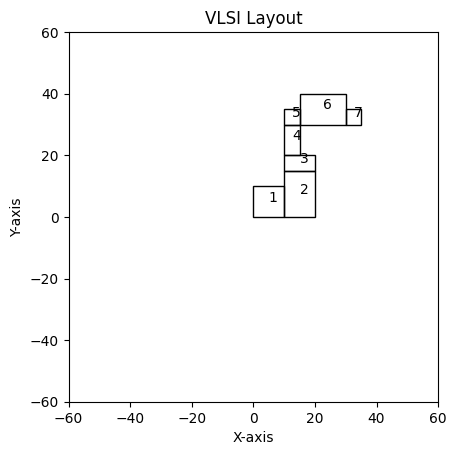

Performing move m2
Polish expression: [1, 2, 'V', 3, 'H', 5, 4, 6, 'H', 'V', 'V', 7, 'H']
Area: 1800
Wiring length: 1320.0
Score at iteration 0: 1680.0
Current score - Previous score = 347.5


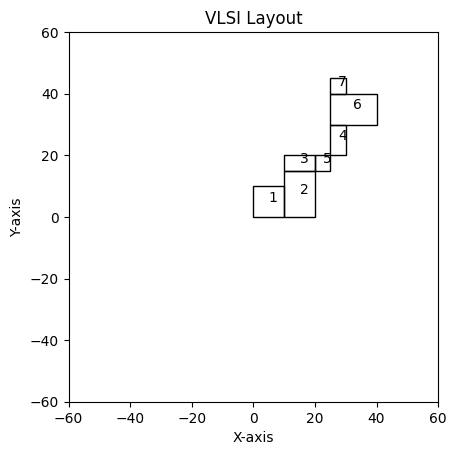

Performing move m3
Polish expression: [1, 2, 'V', 3, 'H', 5, 4, 6, 'H', 'V', 'V', 7, 'H']
Area: 1800
Wiring length: 1320.0
Score at iteration 1: 1680.0
Current score - Previous score = 0.0
0.7173343891518623 < 1.0 trying to find a global minima


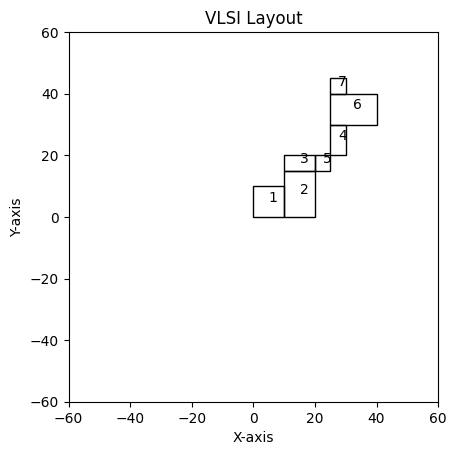

Performing move m2
Polish expression: [1, 2, 'V', 3, 'H', 5, 4, 6, 'H', 'V', 'V', 7, 'H']
Area: 1800
Wiring length: 1320.0
Score at iteration 2: 1680.0
Current score - Previous score = 0.0
0.5286589313320929 < 1.0 trying to find a global minima


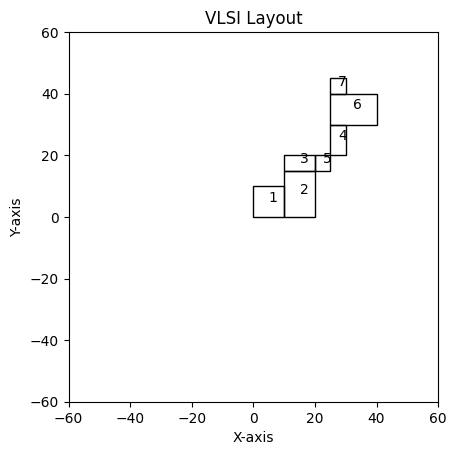

Performing move m1
Polish expression: [2, 1, 'V', 3, 'H', 5, 4, 6, 'H', 'V', 'V', 7, 'H']
Area: 1600
Wiring length: 1200.0
Score at iteration 3: 1500.0
Current score - Previous score = -180.0


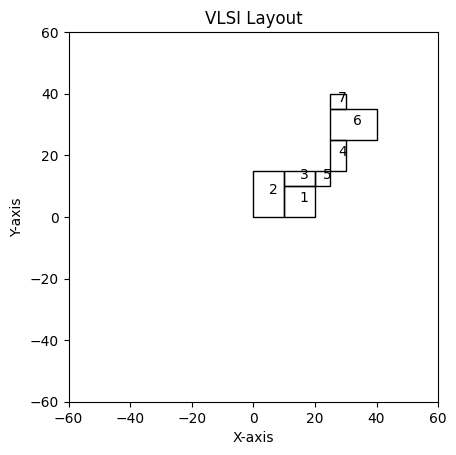

In [87]:
# Function to perform a Heuristic method of Simulated annealing: To accept solution generated by perturbations
# if score is lesser than previous score or if difference in score is lesser than some specified value
# It is chosen with a random probability
# We perform m1, m2 or m3 randomly

def simulated_annealing_heuristic(node, coordinates, polish_expression, wire_length_matrix, t):
  print("-------------------- Simulated Annealing Heuristic --------------------")

  with open(log_file_path, "a") as log_file:
    log_file.write("-------------------- Simulated Annealing Heuristic --------------------\n")
  i = 0
  global_cost_curve = list()
  heuristic_cost_curve = list()
  initial_score = cost_floorplan(floorplan_area(coordinates), routing_length(wire_length_matrix, coordinates))
  global_cost_curve.append(initial_score)
  heuristic_cost_curve.append(initial_score)
  print(f"Initial score: {initial_score}")
  plot_block(coordinates)
  prev_score = initial_score
  while(t > 20):
    coordinates2 = list()
    node1 = None
    temp = []
    x = random.randint(1, 3)
    if(x == 1):
      temp = m1(polish_expression)
      print("Performing move m1")
    elif(x == 2):
      temp = m2(polish_expression)
      print("Performing move m2")
    elif(x == 3):
      temp = m3(polish_expression)
      print("Performing move m3")
    node1 = ptog(temp)
    coordinates2 = plot(node1, coordinates2)
    curr_score = cost_floorplan(floorplan_area(coordinates2), routing_length(wire_length_matrix, coordinates2))
    print(f"Polish expression: {polish_expression}")
    print(f"Area: {floorplan_area(coordinates2)}")
    print(f"Wiring length: {routing_length(wire_length_matrix, coordinates2)}")
    print(f"Score at iteration {i}: {curr_score}")
    global_cost_curve.append(curr_score)
    print(f"Current score - Previous score = {curr_score-prev_score}") # Accepting if it is better than best score
    with open(log_file_path, "a") as log_file:
        log_file.write(f"Polish expression: {polish_expression}\n")
        log_file.write(f"Area: {floorplan_area(coordinates2)}\n")
        log_file.write(f"Wiring length: {routing_length(wire_length_matrix, coordinates2)}\n")
        log_file.write(f"Score at iteration {i}: {curr_score}\n")      # Write the information to the log file
    if(curr_score-prev_score < 0):
      node = node1
      polish_expression = temp
      coordinates = coordinates2
      heuristic_cost_curve.append(curr_score)
    else:
      r = random.random()
      if(r < math.exp(-((curr_score-prev_score)/t))):
        print(f"{r} < {math.exp(-((curr_score-prev_score)/t))} trying to find a global minima") # Accepting with some probability even worse score
        node = node1
        polish_expression = temp
        coordinates = coordinates2
        heuristic_cost_curve.append(curr_score)
    plot_block(coordinates2)
    prev_score = curr_score
    i = i + 1
    t = 0.6*t
  return node, coordinates, polish_expression, global_cost_curve, heuristic_cost_curve
node2, coordinates3, polish_expression2, global_cost_curve2, heuristic_cost_curve = simulated_annealing_heuristic(node, coordinates1, polish_expression, wire_length_matrix, t=150)

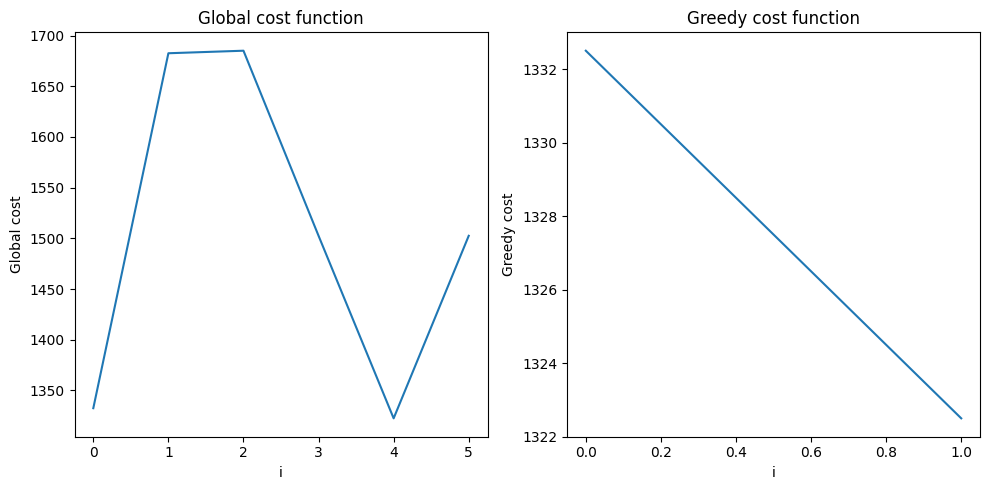

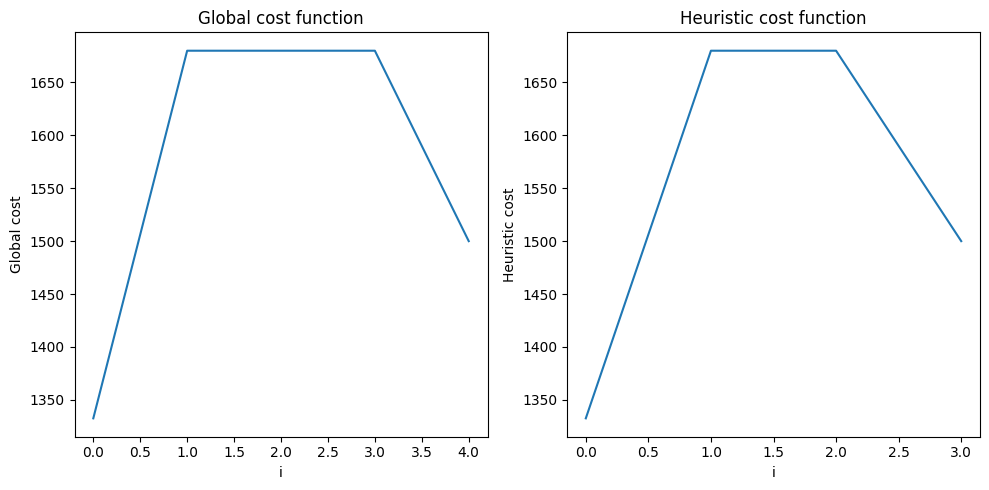

In [88]:
def plot_lists1(list1, list2):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(list1)
    plt.xlabel('i')
    plt.ylabel('Global cost')
    plt.title('Global cost function')

    plt.subplot(1, 2, 2)
    plt.plot(list2)
    plt.xlabel('i')
    plt.ylabel('Greedy cost')
    plt.title('Greedy cost function')

    plt.tight_layout()
    plt.show()

def plot_lists2(list1, list2):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(list1)
    plt.xlabel('i')
    plt.ylabel('Global cost')
    plt.title('Global cost function')

    plt.subplot(1, 2, 2)
    plt.plot(list2)
    plt.xlabel('i')
    plt.ylabel('Heuristic cost')
    plt.title('Heuristic cost function')

    plt.tight_layout()
    plt.show()

plot_lists1(global_cost_curve1, greedy_cost_curve)
plot_lists2(global_cost_curve2, heuristic_cost_curve)

# **Results**

*   Worst case time complexity is O(n^2)
*   Space complexity depends on number of blocks and is O(n^2)